In [3]:
import time
import sys
import inspect #디버깅용
import torch
import tensorflow as tf
import torchvision
import ninja
import click
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

def time_stamp():
    temp = r"%Y-%m-%d %H:%M:%S"
    current_frame = inspect.currentframe()
    tmp = f"{time.strftime(temp, time.localtime(time.time()))}: [{inspect.getframeinfo(current_frame).filename}]:"
    return tmp

def version_all():
    print(f"{time_stamp()}Python 버전📌 {sys.version_info}")
    print(f"{time_stamp()}Pytorch 버전📌 {torch.__version__}")
    print(f"{time_stamp()}torchvision 버전📌 {torchvision.__version__}")
    print(f"{time_stamp()}ninja 버전📌 {ninja.__version__}")
    print(f"{time_stamp()}Tensorflow 버전📌 {tf.__version__}")
    print(f"{time_stamp()}Torch GPU 가능여부📌 {torch.torch.cuda.is_available()}")
    print(f"{time_stamp()}Tensorflow GPU 가능여부📌 {tf.config.list_physical_devices('GPU')}") # 텐서플로우 2.x버전
    # print(f"{time_stamp()}Tensorflow GPU 가능여부📌 {device_lib.list_local_devices()}") # 텐서플로우 1.x버전
    print(f"{time_stamp()}Click Version📌 {click.__version__}") # 텐서플로우 1.x버전
    # print(f"{time_stamp()}cudatoolkit Version📌 {cudatoolkit.__version__}")
    
# GPU 사용 설정
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU 설정 완료")
else:
    print("GPU를 찾을 수 없습니다. CPU")



version_all()

2023-08-15 00:46:37.440928: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-15 00:46:37.459056: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


GPU 설정 완료
2023-08-15 00:46:38: [/tmp/ipykernel_275/3513557779.py]:Python 버전📌 sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0)
2023-08-15 00:46:38: [/tmp/ipykernel_275/3513557779.py]:Pytorch 버전📌 2.0.1+cu117
2023-08-15 00:46:38: [/tmp/ipykernel_275/3513557779.py]:torchvision 버전📌 0.15.2+cu117
2023-08-15 00:46:38: [/tmp/ipykernel_275/3513557779.py]:ninja 버전📌 1.11.1
2023-08-15 00:46:38: [/tmp/ipykernel_275/3513557779.py]:Tensorflow 버전📌 2.13.0
2023-08-15 00:46:38: [/tmp/ipykernel_275/3513557779.py]:Torch GPU 가능여부📌 True
2023-08-15 00:46:38: [/tmp/ipykernel_275/3513557779.py]:Tensorflow GPU 가능여부📌 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2023-08-15 00:46:38: [/tmp/ipykernel_275/3513557779.py]:Click Version📌 8.1.6


2023-08-15 00:46:38.403468: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-15 00:46:38.404046: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-15 00:46:38.404148: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [3]:
!nvcc test_nvcc.cu -o test_nvcc -run

CPU says hello.
GPU says hello.


# GPU 테스트
* NVIDIA GPU 기준, 없다면 CPU로 테스트 진행

---

In [4]:
# 테스트할 데이터 생성
input_data = tf.random.normal((10000, 1000))
print(f"데이터 생성 완료: {input_data.shape}")
before_df = pd.DataFrame(input_data)
before_df

데이터 생성 완료: (10000, 1000)


2023-08-15 00:29:01.339263: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-15 00:29:01.339418: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-15 00:29:01.339549: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-15 00:29:02.183899: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-15 00:29:02.184068: I tensorflow/compile

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-1.168210,1.349127,-0.854028,0.409336,-1.835469,-0.457372,-0.177522,-1.992505,-0.948553,0.204065,...,0.098829,1.309362,-0.049714,0.957832,-0.362864,-1.079736,-0.189254,-1.735668,-0.643880,0.876057
1,-0.527508,0.270189,-1.452178,-0.980168,0.615059,-0.386152,1.167043,0.501811,0.973875,0.273663,...,-1.124370,-1.792743,0.609617,-0.258457,1.559166,0.344502,-1.662147,0.273517,-1.621412,-0.146486
2,-0.633722,1.296109,-0.207300,-0.793437,-2.422495,-1.881656,0.437407,-0.255688,0.844338,-0.154614,...,0.775560,-1.047454,0.389252,0.148610,0.740087,0.357440,-0.298153,-0.318864,1.260440,-0.683796
3,-1.280686,0.415247,-0.739178,-0.345417,-0.025223,0.353818,0.027967,0.064670,1.718670,1.524854,...,0.784675,-0.644891,1.583382,-1.402139,-1.041350,0.101074,-1.634882,-0.495770,0.638223,0.324767
4,0.451490,-1.552419,-0.289710,-2.123409,-0.860684,-0.451715,-0.840873,-0.382034,0.097928,-0.800094,...,-0.119762,-0.137987,0.052948,-0.392496,0.534535,-2.284220,0.329657,0.786446,-0.422670,0.491280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.137492,-0.732939,-0.098758,-0.622943,-0.148596,0.707118,-2.026706,-0.077256,2.255109,1.208460,...,-0.370883,0.314363,-0.392097,-1.124625,0.015628,-1.894038,1.277450,-0.069881,0.977295,1.016667
9996,-1.089010,0.013095,-1.143470,-0.764562,-0.736837,-0.756180,-0.127646,-0.605088,-0.201341,-0.234649,...,-0.642154,0.313740,-0.432525,0.877071,-0.072756,1.496763,-0.177777,-0.579893,0.443538,0.094340
9997,0.762238,1.117830,0.750831,-0.480774,0.832223,-0.460444,-0.175959,-1.175802,-1.449352,0.365101,...,0.113890,-1.899127,-0.590906,-1.743504,1.363686,-0.887074,-0.173570,-0.688762,-1.010124,1.574567
9998,0.296977,0.453343,0.262107,2.374428,-1.484497,0.465641,-0.946833,-1.821712,1.434103,0.973426,...,0.744837,-0.769551,0.286042,0.553946,1.020677,0.017773,-0.106784,0.002583,-1.326676,1.346978


In [6]:
# 몇 번 학습할건지?
num_iterations = 1000000


print(f"TensorFlow 버전:{tf.__version__}")

# 모델 정의 (간단한 덧셈 연산)
def simple_model(input_data):
    return tf.reduce_sum(input_data)

# 첫 번째 실행 (GPU 초기화 등)
print("첫 번째 실행 (GPU 초기화)")
with tf.device('/GPU:0'):
    _ = simple_model(input_data)


print(f"{num_iterations} 번의 연산을 수행하며 GPU 성능 테스트를 진행합니다.")
start_time = time.time()

for _ in range(num_iterations):
    with tf.device('/GPU:0'):
        _ = simple_model(input_data)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"{num_iterations} 번의 연산을 완료하는 데 걸린 총 시간: {elapsed_time:.2f} 초")
print(f"한 번의 연산 평균 소요 시간: {elapsed_time / num_iterations:.4f} 초")


TensorFlow 버전:2.13.0
첫 번째 실행 (GPU 초기화)
1000000 번의 연산을 수행하며 GPU 성능 테스트를 진행합니다.
1000000 번의 연산을 완료하는 데 걸린 총 시간: 65.59 초
한 번의 연산 평균 소요 시간: 0.0001 초


---

# 멀티프로세싱 기능 추가
* 참고: https://d-life93.tistory.com/m/429

2023-08-15 실험시작. 멀티프로세싱 forkserver 기능 추가 중... 

In [6]:
import multiprocessing as mp
import tensorflow as tf
import gc

def predict_test(image, path, img_height=256, img_weight=256):
    # 사용 가능한 GPU 체크
    gpus = tf.config.experimental.list_physical_devices('GPU')

    # 사용 가능한 GPU가 존재 할 경우
    if gpus:
        try:
            # 사용할 GPU number 부여
            tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
            # GPU 메모리를 전부 사용하지 않고 천천히 사용할 만큼만 상승 시킨다.
            tf.config.experimental.set_memory_growth(gpus[0], True)
        except Exception:
            raise {Exception}

    # 모델 불러오기
    model = tf.keras.models.load_model(path)

    # 이미지를 읽어온다.
    img = tf.keras.preprocessing.image.load_img(image, target_size=(img_height, img_weight))
    # 이미지를 array로 변환한다.
    img_array = tf.keras.preprocessing.image.img_to_array(img)

    # 이미지를 4차원으로 변환한다.
    img_array = tf.expand_dims(img_array, 0)

    # 이미지를 예측한다.
    predictions = model.predict(img_array)

    # 예측한 값을 반환한다.
    predict = predictions[0][0]

    result = { predict } 
    return result


def multiprocessing_test():
    # 멀티 프로세싱 설정을 한다. *반드시 force를 사용
    mp.set_start_method('forkserver', force=True)

    # Process Pool생성
    p = mp.Pool()     

    # predict_test를 실행 후 데이터를 반환
    prediction = p.starmap(predict_test, [(image, path, 256, 256)])  

    # machine learning으로 발생한 다량의 데이터를 garbage collect로 정리를 한다.
    # 정리하지 않을 경우 메모리 부족으로 에러가 발생한다.
    gc.collect()

    return prediction 

multiprocessing_test()

---

# 그냥 단편적인 코드조각(Snippets)들.. 테스트용!!

### 📌Tensorflow의 이미지 불러오기

2023-08-15 00:47:25.099844: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-15 00:47:25.099998: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-15 00:47:25.100126: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-15 00:47:25.923219: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-15 00:47:25.923347: I tensorflow/compile

(2160, 4096, 3)


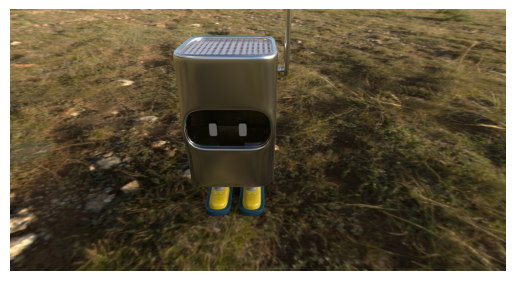

In [5]:
# 이미지 파일 경로
image_path = './test_img.jpg'

# 이미지 파일 읽어오기
image = tf.io.read_file(image_path)
image = tf.image.decode_image(image)

# 이미지 파일 경로
image_path = 'test_img.jpg'

# 이미지 파일 읽어오기
image = tf.io.read_file(image_path)
image = tf.image.decode_image(image)
print(image.shape)
# 이미지 시각화
plt.imshow(image)
plt.axis('off')  # 축 제거
plt.show()

### 📌Torch의 이미지 불러오기

torch.Size([3, 2160, 4096])


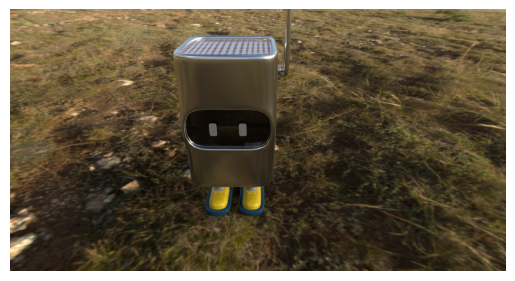

In [6]:
# 이미지 파일 경로
image_path = 'test_img.jpg'

# 이미지 변환을 위한 전처리 단계 정의
preprocess = transforms.Compose([
    transforms.ToTensor(),                  
])

# 이미지 불러오기 및 전처리 적용
image = Image.open(image_path)
image = preprocess(image)
print(image.shape)
# 이미지 시각화
plt.imshow(image.permute(1, 2, 0))  # PyTorch 텐서의 채널 순서를 변환하여 표시
plt.axis('off')  # 축 제거
plt.show()